# Salary Predictions Based on Job Descriptions

# Part 1 - DEFINE

### ---- 1 Define the problem ----

Write the problem in your own words here

In [2]:
#import your libraries
import pandas as pd
import sklearn as sk
#etc

#your info here
__author__ = "Arielle Dortch"
__email__ = "arielledortch@gmail.com"

## Part 2 - DISCOVER

### ---- 2 Load the data ----

In [3]:
#load the data into a Pandas dataframe
train_salaries_df= pd.read_csv('/Users/arielledortch/Downloads/DSDJ/train_salaries.csv')
train_features_df= pd.read_csv('/Users/arielledortch/Downloads/DSDJ/train_features.csv')
test_features_df= pd.read_csv('/Users/arielledortch/Downloads/DSDJ/test_features.csv')

### ---- 3 Examine the data ----

In [4]:
train_salaries_df.head(5)

,jobId,salary
0,JOB1362684407687,130
1,JOB1362684407688,101
2,JOB1362684407689,137
3,JOB1362684407690,142
4,JOB1362684407691,163


In [5]:
train_features_df.head(5)

,jobId,companyId,jobType,degree,major,industry,yearsExperience,milesFromMetropolis
0,JOB1362684407687,COMP37,CFO,MASTERS,MATH,HEALTH,10,83
1,JOB1362684407688,COMP19,CEO,HIGH_SCHOOL,NONE,WEB,3,73
2,JOB1362684407689,COMP52,VICE_PRESIDENT,DOCTORAL,PHYSICS,HEALTH,10,38
3,JOB1362684407690,COMP38,MANAGER,DOCTORAL,CHEMISTRY,AUTO,8,17
4,JOB1362684407691,COMP7,VICE_PRESIDENT,BACHELORS,PHYSICS,FINANCE,8,16


In [6]:
test_features_df.head(5)

,jobId,companyId,jobType,degree,major,industry,yearsExperience,milesFromMetropolis
0,JOB1362685407687,COMP33,MANAGER,HIGH_SCHOOL,NONE,HEALTH,22,73
1,JOB1362685407688,COMP13,JUNIOR,NONE,NONE,AUTO,20,47
2,JOB1362685407689,COMP10,CTO,MASTERS,BIOLOGY,HEALTH,17,9
3,JOB1362685407690,COMP21,MANAGER,HIGH_SCHOOL,NONE,OIL,14,96
4,JOB1362685407691,COMP36,JUNIOR,DOCTORAL,BIOLOGY,OIL,10,44


### ---- 4 Clean the data ----

In [7]:
#look for duplicate data

In [8]:
#look for duplicate data, invalid data
train_salaries_df.duplicated().sum()

0

In [9]:
train_features_df.duplicated().sum()

0

In [10]:
test_features_df.duplicated().sum()

0

In [16]:
#look for corrupt data and remove it
train_salaries_df.isnull().values.any()

False

In [15]:
train_features_df.isnull().values.any()

False

In [17]:
test_features_df.isnull().values.any()

False

In [18]:
#look for invalid data
train_salaries_df[train_salaries_df['salary']<=0]

,jobId,salary
30559,JOB1362684438246,0
495984,JOB1362684903671,0
652076,JOB1362685059763,0
816129,JOB1362685223816,0
828156,JOB1362685235843,0


In [19]:
train_salaries_df= train_salaries_df[train_salaries_df['salary']>0]

### ---- 5 Explore the data (EDA) ----

In [3]:
#summarize each feature variable
#summarize the target variable
#look for correlation between each feature and the target
#look for correlation between features

In [20]:
train_features_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000000 entries, 0 to 999999
Data columns (total 8 columns):
jobId                  1000000 non-null object
companyId              1000000 non-null object
jobType                1000000 non-null object
degree                 1000000 non-null object
major                  1000000 non-null object
industry               1000000 non-null object
yearsExperience        1000000 non-null int64
milesFromMetropolis    1000000 non-null int64
dtypes: int64(2), object(6)
memory usage: 61.0+ MB


In [21]:
categorical_variables = ['jobId','companyId','jobType','degree','major','industry']
numerical_variables = ['yearsExperience','milesFromMetropolis']

In [23]:
import numpy as np
train_features_df.describe(include = [np.number])

,yearsExperience,milesFromMetropolis
count,1000000.000000,1000000.000000
mean,11.992386,49.529260
std,7.212391,28.877733
min,0.000000,0.000000
25%,6.000000,25.000000
50%,12.000000,50.000000
75%,18.000000,75.000000
max,24.000000,99.000000


In [24]:
train_features_df.describe(include = 'O')

,jobId,companyId,jobType,degree,major,industry
count,1000000,1000000,1000000,1000000,1000000,1000000
unique,1000000,63,8,5,9,7
top,JOB1362684615914,COMP39,SENIOR,HIGH_SCHOOL,NONE,WEB
freq,1,16193,125886,236976,532355,143206


In [26]:
#merge feature and target variables in order to look for correlation
train_df = pd.merge(train_features_df, train_salaries_df, on = 'jobId')
train_df.head(5)

,jobId,companyId,jobType,degree,major,industry,yearsExperience,milesFromMetropolis,salary
0,JOB1362684407687,COMP37,CFO,MASTERS,MATH,HEALTH,10,83,130
1,JOB1362684407688,COMP19,CEO,HIGH_SCHOOL,NONE,WEB,3,73,101
2,JOB1362684407689,COMP52,VICE_PRESIDENT,DOCTORAL,PHYSICS,HEALTH,10,38,137
3,JOB1362684407690,COMP38,MANAGER,DOCTORAL,CHEMISTRY,AUTO,8,17,142
4,JOB1362684407691,COMP7,VICE_PRESIDENT,BACHELORS,PHYSICS,FINANCE,8,16,163


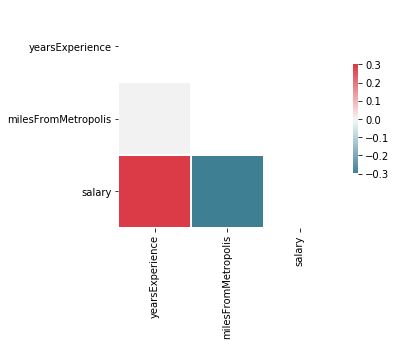

In [29]:
#Correlation of variables
import seaborn as sns
import matplotlib.pyplot as plt

corr = train_df.corr()

# Generate a mask for the upper triangle
mask = np.zeros_like(corr, dtype=np.bool)
mask[np.triu_indices_from(mask)] = True

# Set up the matplotlib figure
#f, ax = plt.subplots(figsize=(11, 9))

# Generate a custom diverging colormap
cmap = sns.diverging_palette(220, 10, as_cmap=True)

# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(corr, mask=mask, cmap=cmap, vmax=.3, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .5})
plt.show()

/Users/arielledortch/anaconda3/lib/python3.6/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


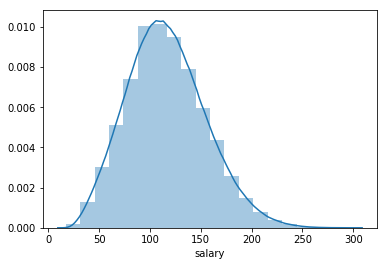

In [30]:
sns.distplot(train_df.salary, bins = 20)
plt.show()

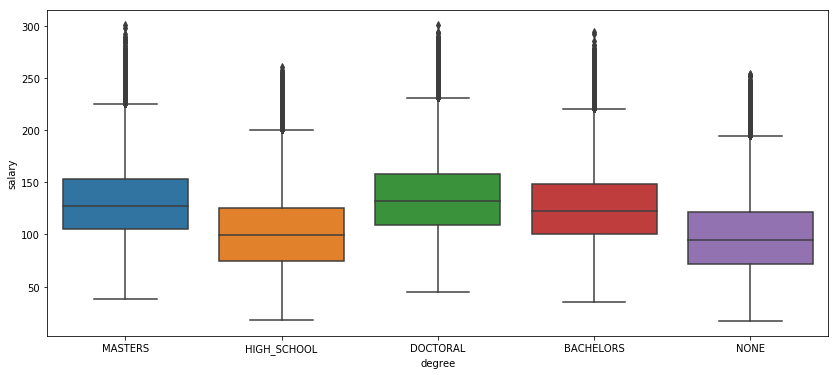

In [58]:
#look for correlation between each feature and the target
plt.figure(figsize= (14,6))
sns.boxplot(
    x='degree',
    y='salary',
    data=train_df
)

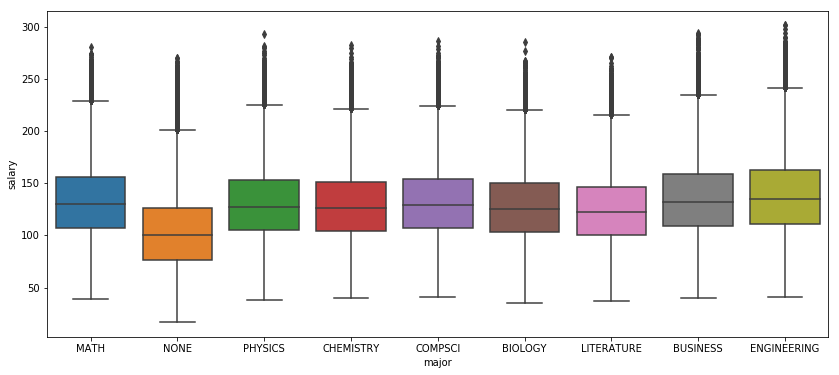

In [57]:
plt.figure(figsize= (14,6))
sns.boxplot(
    x='major',
    y='salary',
    data=train_df
)

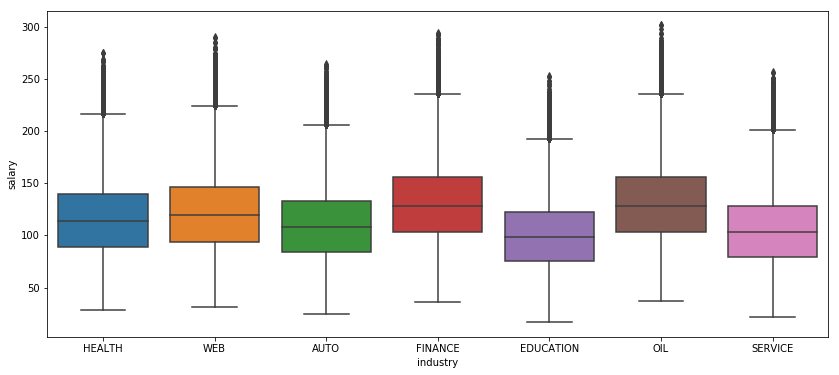

In [59]:
plt.figure(figsize= (14,6))
sns.boxplot(
    x='industry',
    y='salary',
    data=train_df
)

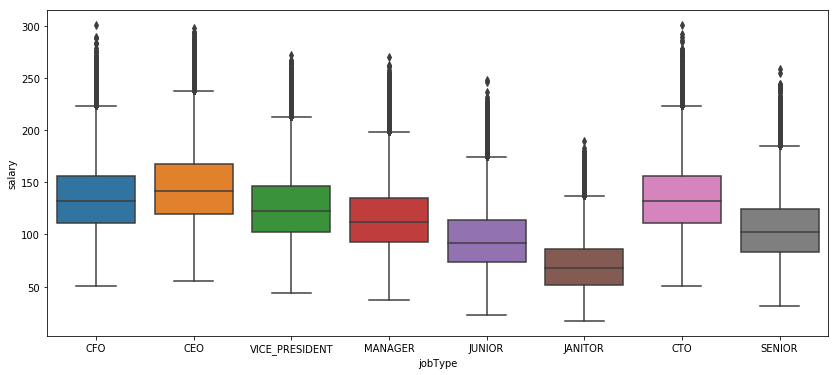

In [60]:
plt.figure(figsize= (14,6))
sns.boxplot(
    x='jobType',
    y='salary',
    data=train_df
)

In [123]:
# import labelencoder
from sklearn.preprocessing import LabelEncoder
# instantiate labelencoder object
le = LabelEncoder()
# apply le on categorical feature columns
train_df[categorical_variables] = train_df[categorical_variables].apply(lambda col: le.fit_transform(col))
test_features_df[categorical_variables] = test_features_df[categorical_variables].apply(lambda col: le.fit_transform(col))
test_features_df.head()

,jobId,companyId,jobType,degree,major,industry,yearsExperience,milesFromMetropolis
0,0,27,5,2,7,3,22,73
1,1,5,4,4,7,0,20,47
2,2,2,2,3,0,3,17,9
3,3,14,5,2,7,4,14,96
4,4,30,4,1,0,4,10,44


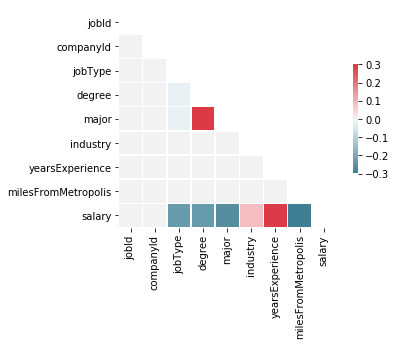

In [80]:
#Correlation of variables
corr = train_df.corr()

# Generate a mask for the upper triangle
mask = np.zeros_like(corr, dtype=np.bool)
mask[np.triu_indices_from(mask)] = True

# Set up the matplotlib figure
#f, ax = plt.subplots(figsize=(11, 9))

# Generate a custom diverging colormap
cmap = sns.diverging_palette(220, 10, as_cmap=True)

# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(corr, mask=mask, cmap=cmap, vmax=.3, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .5})
plt.show()

### ---- 6 Establish a baseline ----

In [5]:
#select a reasonable metric (MSE in this case)
#create an extremely simple model and measure its efficacy
#e.g. use "average salary" for each industry as your model and then measure MSE
#during 5-fold cross-validation

In [117]:
#Predictive Model
X = train_df[['jobType','degree','major','industry','yearsExperience','milesFromMetropolis']]
Y= train_df['salary']

from sklearn import linear_model 
regr = linear_model.LinearRegression()
regr.fit(X, Y)

print('Intercept: \n', regr.intercept_)
print('Coefficients: \n', regr.coef_)

Intercept: 
 148.27029257971947
Coefficients: 
 [-3.99147948 -4.39086358 -3.3686501   1.6767114   2.01373953 -0.40014828]


In [118]:
# Regression
import statsmodels.api as sm
X = sm.add_constant(X) # adding a constant
model = sm.OLS(Y, X).fit()
predictions = model.predict(X) 
 
print_model = model.summary()
print(print_model)

                            OLS Regression Results                            
Dep. Variable:                 salary   R-squared:                       0.383
Model:                            OLS   Adj. R-squared:                  0.383
Method:                 Least Squares   F-statistic:                 1.034e+05
Date:                Wed, 02 Oct 2019   Prob (F-statistic):               0.00
Time:                        10:34:06   Log-Likelihood:            -4.8339e+06
No. Observations:              999995   AIC:                         9.668e+06
Df Residuals:                  999988   BIC:                         9.668e+06
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
const                 148.2703    

In [124]:
from sklearn.model_selection import cross_validate
from sklearn import datasets, linear_model
X = train_df[['jobType','degree','major','industry','yearsExperience','milesFromMetropolis']]
Y= train_df['salary']
lasso = linear_model.Lasso()
cv_results = cross_validate(lasso, X, Y, cv=5)
sorted(cv_results.keys()) 
cv_results['test_score']  

array([0.38257757, 0.38279241, 0.38145541, 0.37989409, 0.38413067])

In [125]:
scores = cross_validate(lasso, X, Y, cv=5,                         
                        scoring=('r2', 'neg_mean_squared_error'),
                        return_train_score=True)
mean_mse= -1.0*np.mean(scores['test_neg_mean_squared_error'])
print(scores['test_neg_mean_squared_error'])
print(mean_mse)   

[-927.80950436 -927.16597358 -929.52778218 -926.58440818 -919.56387067]
926.1303077910925


In [149]:
from sklearn.ensemble import RandomForestRegressor
rf= RandomForestRegressor(n_estimators= 100, n_jobs=4, max_depth=20, min_samples_split=80, max_features=0.5, verbose= 5)
cv_results = cross_validate(rf, X, Y, cv=5)
sorted(cv_results.keys()) 
cv_results['test_score']  

[Parallel(n_jobs=4)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done  10 tasks      | elapsed:    9.0s
[Parallel(n_jobs=4)]: Done  60 out of  60 | elapsed:   27.9s finished
[Parallel(n_jobs=4)]: Using backend ThreadingBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done  10 tasks      | elapsed:    0.2s
[Parallel(n_jobs=4)]: Done  60 out of  60 | elapsed:    1.1s finished
[Parallel(n_jobs=4)]: Using backend ThreadingBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done  10 tasks      | elapsed:    0.8s
[Parallel(n_jobs=4)]: Done  60 out of  60 | elapsed:    4.1s finished
[Parallel(n_jobs=4)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done  10 tasks      | elapsed:    4.6s
[Parallel(n_jobs=4)]: Done  60 out of  60 | elapsed:   22.2s finished
[Parallel(n_jobs=4)]: Using backend ThreadingBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done  10 tasks      | elapsed:    0.2s
[Parallel(n_jobs=4)]: Don

array([0.73557795, 0.73629123, 0.73569545, 0.73577031, 0.73661733])

In [130]:
scores = cross_validate(rf, X, Y, cv=5,                         
                        scoring=('r2', 'neg_mean_squared_error'),
                        return_train_score=True)
mean_mse= -1.0*np.mean(scores['test_neg_mean_squared_error'])
print(scores['test_neg_mean_squared_error'])
print(mean_mse)   

[Parallel(n_jobs=2)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=2)]: Done  14 tasks      | elapsed:   10.4s
[Parallel(n_jobs=2)]: Done  60 out of  60 | elapsed:   43.7s finished
[Parallel(n_jobs=2)]: Using backend ThreadingBackend with 2 concurrent workers.
[Parallel(n_jobs=2)]: Done  14 tasks      | elapsed:    0.4s
[Parallel(n_jobs=2)]: Done  60 out of  60 | elapsed:    2.0s finished
[Parallel(n_jobs=2)]: Using backend ThreadingBackend with 2 concurrent workers.
[Parallel(n_jobs=2)]: Done  14 tasks      | elapsed:    0.4s
[Parallel(n_jobs=2)]: Done  60 out of  60 | elapsed:    1.6s finished
[Parallel(n_jobs=2)]: Using backend ThreadingBackend with 2 concurrent workers.
[Parallel(n_jobs=2)]: Done  14 tasks      | elapsed:    1.5s
[Parallel(n_jobs=2)]: Done  60 out of  60 | elapsed:    6.6s finished
[Parallel(n_jobs=2)]: Using backend ThreadingBackend with 2 concurrent workers.
[Parallel(n_jobs=2)]: Done  14 tasks      | elapsed:    2.5s
[Parallel(n_jobs=2)]

[-374.33100159 -373.57979046 -374.49445273 -370.88643138 -370.02725917]
372.6637870662289


[Parallel(n_jobs=2)]: Done  60 out of  60 | elapsed:    7.6s finished


In [144]:
from sklearn.ensemble import GradientBoostingRegressor
gbr= GradientBoostingRegressor(n_estimators= 100, max_depth=5, loss= 'ls', verbose= 5)
cv_results = cross_validate(gbr, X, Y, cv=5)
sorted(cv_results.keys()) 
cv_results['test_score']  

      Iter       Train Loss   Remaining Time 
         1        1336.8097            3.30m
         2        1205.0298            3.24m
         3        1096.8894            3.16m
         4        1005.8857            3.13m
         5         930.1229            3.09m
         6         867.1869            3.05m
         7         813.6304            3.01m
         8         768.5892            2.98m
         9         730.5078            2.93m
        10         697.4872            2.90m
        11         669.0092            2.86m
        12         643.1762            2.82m
        13         621.0038            2.79m
        14         601.7265            2.75m
        15         584.9951            2.71m
        16         569.1971            2.68m
        17         555.7202            2.65m
        18         544.5249            2.61m
        19         533.9868            2.58m
        20         522.2816            2.54m
        21         514.0338            2.51m
        2

        82         378.9338           33.07s
        83         378.6432           31.22s
        84         378.5351           29.38s
        85         378.3618           27.49s
        86         378.2535           25.66s
        87         378.0747           23.81s
        88         377.9943           21.97s
        89         377.6580           20.12s
        90         377.5295           18.27s
        91         377.4669           16.43s
        92         377.3880           14.60s
        93         377.2976           12.76s
        94         377.2246           10.93s
        95         376.9437            9.10s
        96         376.8180            7.28s
        97         376.7648            5.45s
        98         376.6759            3.63s
        99         376.4621            1.82s
       100         376.2703            0.00s
      Iter       Train Loss   Remaining Time 
         1        1340.1121            3.11m
         2        1207.3012            3.13m
         

        63         387.4719            1.12m
        64         386.4564            1.09m
        65         385.9758            1.06m
        66         385.6094            1.02m
        67         384.9974           59.68s
        68         384.7233           57.83s
        69         383.9080           55.96s
        70         383.6756           54.17s
        71         383.0503           52.33s
        72         382.6917           50.55s
        73         382.0758           48.69s
        74         381.8687           46.88s
        75         381.5636           45.03s
        76         381.1003           43.20s
        77         380.7933           41.39s
        78         380.6646           39.56s
        79         380.2895           37.74s
        80         380.1887           35.94s
        81         379.9676           34.13s
        82         379.6262           32.32s
        83         379.4967           30.54s
        84         379.0721           28.72s
        85

array([0.74713435, 0.74785559, 0.74751812, 0.74763582, 0.74850379])

In [145]:
scores = cross_validate(gbr, X, Y, cv=5,                         
                        scoring=('r2', 'neg_mean_squared_error'),
                        return_train_score=True)
mean_mse= -1.0*np.mean(scores['test_neg_mean_squared_error'])
print(scores['test_neg_mean_squared_error'])
print(mean_mse)  

      Iter       Train Loss   Remaining Time 
         1        1336.8097            3.26m
         2        1205.0298            3.19m
         3        1096.8894            3.09m
         4        1005.8857            3.05m
         5         930.1229            3.09m
         6         867.1869            3.19m
         7         813.6304            3.23m
         8         768.5892            3.17m
         9         730.5078            3.09m
        10         697.4872            3.06m
        11         669.0092            3.01m
        12         643.1762            2.96m
        13         621.0038            2.91m
        14         601.7265            2.86m
        15         584.9951            2.81m
        16         569.1971            2.76m
        17         555.7202            2.72m
        18         544.5249            2.68m
        19         533.9868            2.63m
        20         522.2816            2.60m
        21         514.0338            2.56m
        2

        82         378.9338           32.64s
        83         378.6432           30.81s
        84         378.5351           28.98s
        85         378.3618           27.13s
        86         378.2535           25.32s
        87         378.0747           23.50s
        88         377.9943           21.68s
        89         377.6580           19.86s
        90         377.5295           18.03s
        91         377.4669           16.21s
        92         377.3880           14.42s
        93         377.2976           12.60s
        94         377.2246           10.79s
        95         376.9437            8.98s
        96         376.8180            7.18s
        97         376.7648            5.38s
        98         376.6759            3.59s
        99         376.4621            1.79s
       100         376.2703            0.00s
      Iter       Train Loss   Remaining Time 
         1        1340.1121            3.11m
         2        1207.3012            3.12m
         

        63         387.4719            1.11m
        64         386.4564            1.08m
        65         385.9758            1.05m
        66         385.6094            1.02m
        67         384.9974           59.35s
        68         384.7233           57.51s
        69         383.9080           55.67s
        70         383.6756           53.86s
        71         383.0503           52.04s
        72         382.6917           50.27s
        73         382.0758           48.41s
        74         381.8687           46.60s
        75         381.5636           44.78s
        76         381.1003           42.96s
        77         380.7933           41.18s
        78         380.6646           39.35s
        79         380.2895           37.55s
        80         380.1887           35.75s
        81         379.9676           33.96s
        82         379.6262           32.15s
        83         379.4967           30.37s
        84         379.0721           28.56s
        85

In [ ]:
X_train = train_df['jobType','degree','major','industry','yearsExperience','milesFromMetropolis']
y_train = train_df['salary']
X_test = test_features_df['jobType','degree','major','industry','yearsExperience','milesFromMetropolis']
y_test = test_features_df['salary']
tree_model_maker = DecisionTreeRegressor(random_state= 9999, max_depth =5)
tree_model_fit = tree_model_maker.fit(X,Y)


### ---- 7 Hypothesize solution ----

In [ ]:
#brainstorm 3 models that you think may improve results over the baseline model based
#on your 

Brainstorm 3 models that you think may improve results over the baseline model based on your EDA and explain why they're reasonable solutions here.

Also write down any new features that you think you should try adding to the model based on your EDA, e.g. interaction variables, summary statistics for each group, etc

## Part 3 - DEVELOP

You will cycle through creating features, tuning models, and training/validing models (steps 7-9) until you've reached your efficacy goal

#### Your metric will be MSE and your goal is:
 - <360 for entry-level data science roles
 - <320 for senior data science roles

### ---- 8 Engineer features  ----

In [150]:
#make sure that data is ready for modeling
#create any new features needed to potentially enhance model
stats = train_df.groupby('jobType','degree','major','industry')['salary'].agg(['mean', 'max', 'min'])
stats.columns = ['mean', 'max', 'min']

ValueError: No axis named degree for object type <class 'pandas.core.frame.DataFrame'>

### ---- 9 Create models ----

In [15]:
#create and tune the models that you brainstormed during part 2

### ---- 10 Test models ----

In [1]:
#do 5-fold cross validation on models and measure MSE

### ---- 11 Select best model  ----

In [ ]:
#select the model with the lowest error as your "prodcuction" model

## Part 4 - DEPLOY

### ---- 12 Automate pipeline ----

In [ ]:
#write script that trains model on entire training set, saves model to disk,
#and scores the "test" dataset

### ---- 13 Deploy solution ----

In [16]:
#save your prediction to a csv file or optionally save them as a table in a SQL database
#additionally, you want to save a visualization and summary of your prediction and feature importances
#these visualizations and summaries will be extremely useful to business stakeholders

### ---- 14 Measure efficacy ----

We'll skip this step since we don't have the outcomes for the test data